# Project: Supermarket sales Analysis

# Dataset Information:




Context
The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

Attribute information
1. Invoice id: Computer generated sales slip invoice identification number
2. Branch: Branch of supercenter (3 branches are available identified by A, B and C).
3. City: Location of supercenters
4. Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
5. Gender: Gender type of customer
6. Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
7. Unit price: Price of each product in $
8. Quantity: Number of products purchased by customer
9. Tax: 5% tax fee for customer buying
10. Total: Total price including tax
11. Date: Date of purchase (Record available from January 2019 to March 2019)
12.Time: Purchase time (10am to 9pm)
13. Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
14. COGS: Cost of goods sold
15. Gross margin percentage: Gross margin percentage
16. Gross income: Gross income
17. Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

# Import Library 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Dataset

In [7]:
new_df=pd.read_csv('super.csv')
new_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# Understand Data

In [8]:
# copy dataset
df=new_df.copy()

In [9]:
# show first five rows
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [10]:
# show last five rows
df.tail(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [11]:
# show random five rows
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
235,645-78-8093,A,Yangon,Normal,Female,Sports and travel,93.14,2,9.3140,195.5940,1/20/2019,18:09,Ewallet,186.28,4.761905,9.3140,4.1
977,518-71-6847,B,Mandalay,Member,Male,Food and beverages,26.60,6,7.9800,167.5800,2/26/2019,15:10,Ewallet,159.60,4.761905,7.9800,4.9
687,648-83-1321,A,Yangon,Member,Male,Home and lifestyle,63.56,10,31.7800,667.3800,1/16/2019,17:59,Cash,635.60,4.761905,31.7800,4.3
905,118-62-1812,C,Naypyitaw,Member,Female,Home and lifestyle,78.38,4,15.6760,329.1960,3/24/2019,17:56,Cash,313.52,4.761905,15.6760,7.9
525,719-89-8991,A,Yangon,Member,Female,Sports and travel,91.41,5,22.8525,479.9025,2/25/2019,16:03,Ewallet,457.05,4.761905,22.8525,7.1


In [12]:
# show data shape
df.shape

(1000, 17)

In [13]:
# show data types
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [14]:
# show columns name
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [15]:
# show data info
df.info("")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [16]:
# show basic statistics
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


# Data Cleaning & Prepocessing

In [19]:
# check data duplicated
df.duplicated().sum()

0

In [20]:
# check null value
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

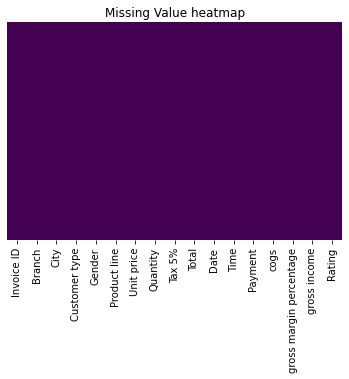

In [23]:
# plot missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Value heatmap');

In [24]:
# change date column data type
df['Date']=pd.to_datetime(df['Date'])

In [32]:
#extract year,month,day
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month_name()
df['Day']=df['Date'].dt.day

In [36]:
df.drop(columns=['Date'],axis=1,inplace=True)

In [40]:
df.rename(columns={'Total':'Sales'},inplace=True)


In [42]:
df[['Hour','Minutes']]=df['Time'].str.split(':',expand=True)

In [ ]:
df.drop(columns=['Time','Minutes','gross margin percentage'],axis=1,inplace=True)

# Exploratory Data Analysis

In [47]:
# Total Sales
df.Sales.sum()

322966.749

In [48]:
#Average Sales
df.Sales.mean()

322.96674900000005

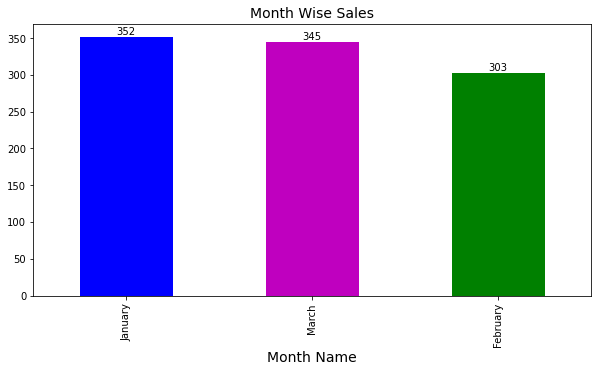

In [76]:
#Sales Trend Month Wise
plt.figure(figsize=(10,5))
ax=df.Month.value_counts().plot(kind='bar',color=['b','m','g'])
plt.title('Month Wise Sales',fontsize=14)
plt.xlabel('Month Name',fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)

# Sales Trend Month Wise

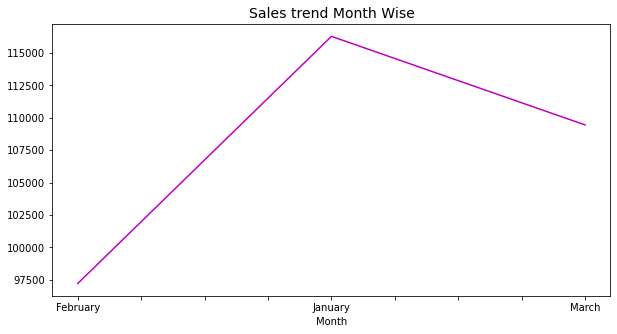

In [72]:
plt.figure(figsize=(10,5))
ax=df.groupby('Month')['Sales'].sum().plot(kind='line',color='m')
plt.title('Sales trend Month Wise',fontsize=14)
for i in ax.containers:
    ax.line_label(i,)

Observation: The most purchased in January, so the highest amount of sale in that month. The least sold in February.

# Gross Income Trend Month Wise

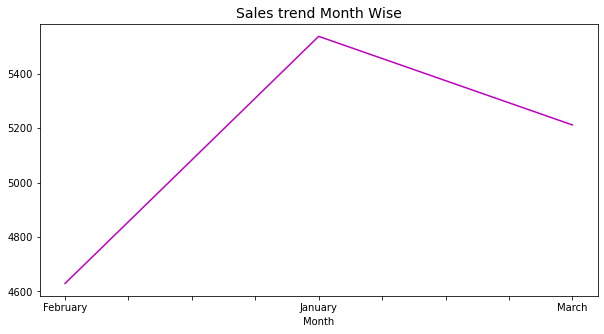

In [77]:
plt.figure(figsize=(10,5))
ax=df.groupby('Month')['gross income'].sum().plot(kind='line',color='m')
plt.title('Sales trend Month Wise',fontsize=14)
for i in ax.containers:
    ax.line_label(i,)

Observation:Gross Income follow the same trend as the sales.

# Sales Trend Hour Wise

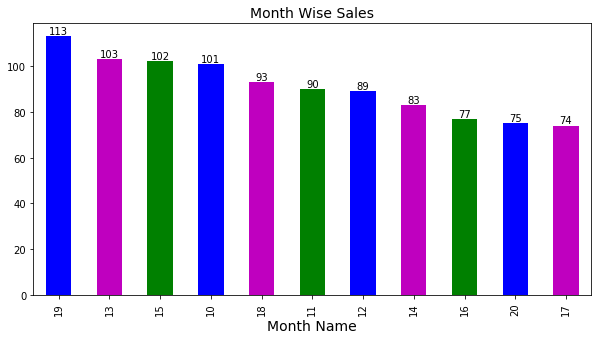

In [79]:
#Sales count Hour Wise
plt.figure(figsize=(10,5))
ax=df.Hour.value_counts().plot(kind='bar',color=['b','m','g'])
plt.title('Month Wise Sales',fontsize=14)
plt.xlabel('Month Name',fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)

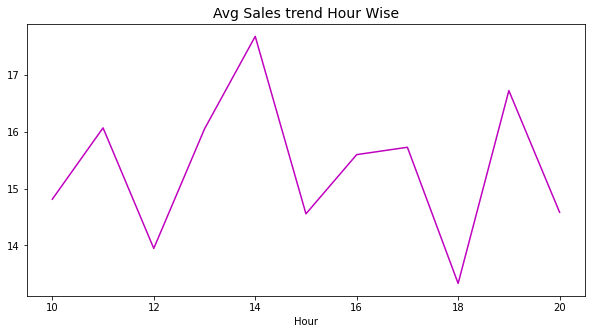

In [82]:
plt.figure(figsize=(10,5))
ax=df.groupby('Hour')['gross income'].mean().plot(kind='line',color='m')
plt.title('Avg Sales trend Hour Wise',fontsize=14)
for i in ax.containers:
    ax.line_label(i,)

Ovservation: The highest sale was sold at 7pm but the average was sold between 12pm and 5pm.

# Distribution of count of sales from different cities of the superstore

In [83]:
df.City.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

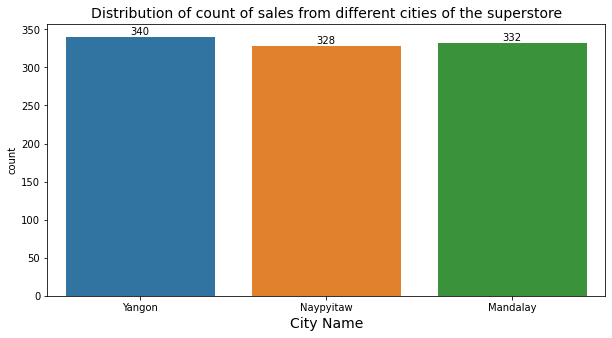

In [85]:
plt.figure(figsize=(10,5))
##ax=df.City.value_counts().plot(kind='bar',color=['b','m','g'])
ax=sns.countplot(data=df,x=df['City'])
plt.title('Distribution of count of sales from different cities of the superstore',fontsize=14)
plt.xlabel('City Name',fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)

Observation: Count of sales from Yangon city is the highest.The funny thing is that every city has been sold almost the same.

# Sales From Different Cities

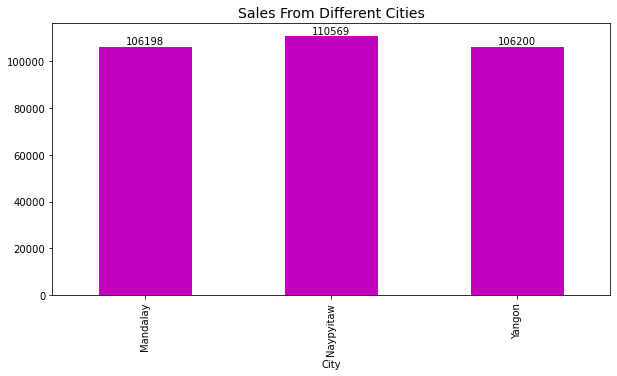

In [88]:
plt.figure(figsize=(10,5))
ax=df.groupby('City')['Sales'].sum().plot(kind='bar',color='m')
plt.title('Sales From Different Cities',fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)

observation: Sum of Sales from the city Naypyitaw is the highest. But Count of sales is high in Yangoon City.

# Count Of Customer Type

In [90]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

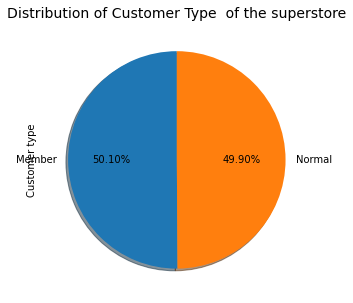

In [99]:
plt.figure(figsize=(10,5))
ax=df['Customer type'].value_counts().plot(kind='pie',shadow=True,startangle=90,autopct='%1.2f%%')
plt.title('Distribution of Customer Type  of the superstore',fontsize=14);
#plt.xlabel('Customer Type',fontsize=14);

Observation: Members and Normal Customers have an equal distribution in terms of count of sales

# average sales customer type wise

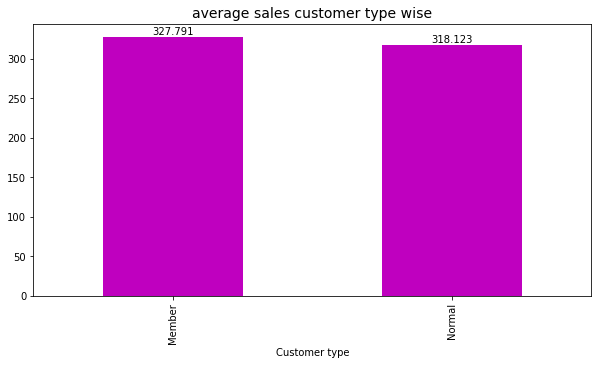

In [102]:
plt.figure(figsize=(10,5))
ax=df.groupby('Customer type')['Sales'].mean().plot(kind='bar',color='m')
plt.title('average sales customer type wise',fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)

Observation: Member Customers Average Total Sales is higher than the Normal Customers Average Total Sales


# Distribution of Average sales as per customer types for each city

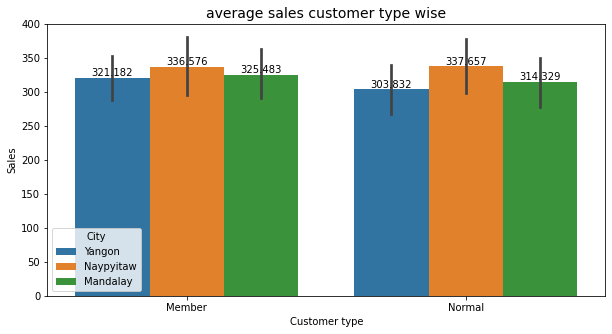

In [106]:
plt.figure(figsize=(10,5))
ax=sns.barplot(data=df,x=df['Customer type'],y=df['Sales'],hue=df['City'])
plt.title('average sales customer type wise',fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)

Observations
1. Member customers in Naypyitaw are giving us highest sales.
2. Normal customers in Naypyitaw are giving us highest sales.
3. Naypyitaw city is good from  sales perspective.

# Distribution of Product Line

In [108]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

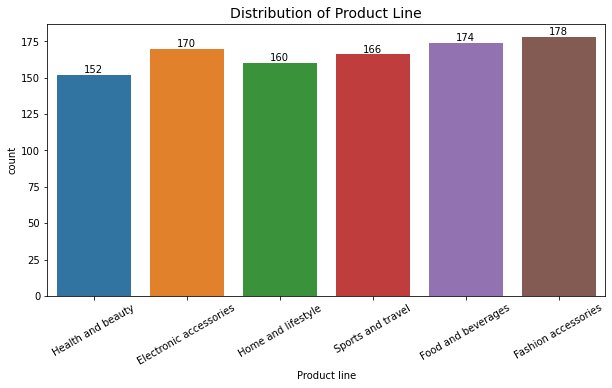

In [114]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x=df['Product line'])
plt.title('Distribution of Product Line',fontsize=14)
plt.xticks(rotation=30)
for i in ax.containers:
    ax.bar_label(i,)

Observation:Health and Beauty is getting picked up by the people the least while the Fashion Accessories are being purchased by the people the most.


# Distribution of the total sales City and Product line wise.¶

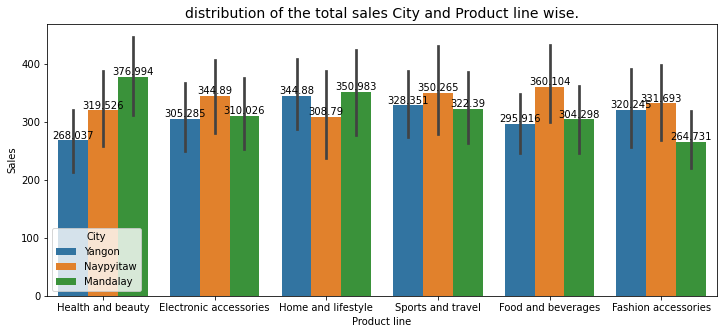

In [119]:
plt.figure(figsize=(12,5))
ax=sns.barplot(data=df,x=df['Product line'],y=df['Sales'],hue=df['City'])
plt.title('distribution of the total sales City and Product line wise.',fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)

Observations
1. In city Yangon, customers spend on Health and Beauty the least and Home and Lifestyle the most.
2. In city Mandalay, customers spend on Health and Beauty the most and Fashion Accessories the least.
3. In city Naypyitaw, customers spend on Home and lifestyle the least and Food and Beverages the most


# Distribution of the total sales Customer Type and Product line wise

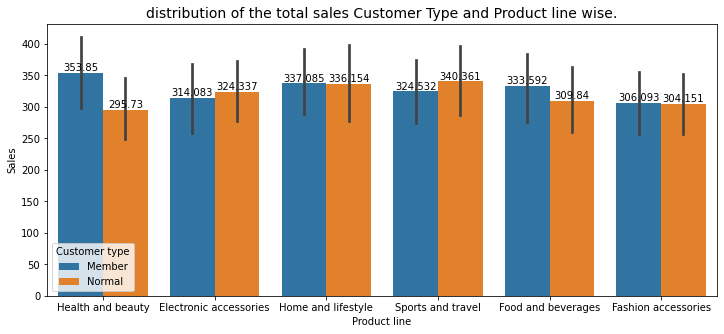

In [121]:
plt.figure(figsize=(12,5))
ax=sns.barplot(data=df,x=df['Product line'],y=df['Sales'],hue=df['Customer type'])
plt.title('distribution of the total sales Customer Type and Product line wise.',fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)

Observations:

1. Member customers spend on Health and beauty the most  which is the highest across all product lines.
2. Normal customers spend on Health and beauty the least  which is the least across all product lines.
3. Member customers spend on Fashion Accessories the least 
4. Normal customers spend on Sports and Travel the most 

# Distribution of the total sales Customer Type and Product line wise

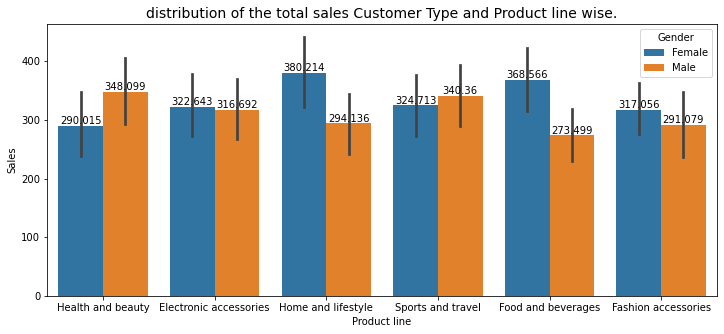

In [122]:
plt.figure(figsize=(12,5))
ax=sns.barplot(data=df,x=df['Product line'],y=df['Sales'],hue=df['Gender'])
plt.title('distribution of the total sales Customer Type and Product line wise.',fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)

# Distribution of the total sales Customer Type and Product line wise

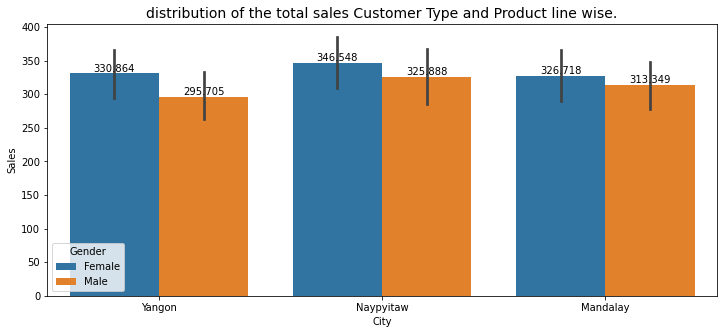

In [123]:
plt.figure(figsize=(12,5))
ax=sns.barplot(data=df,x=df['City'],y=df['Sales'],hue=df['Gender'])
plt.title('distribution of the total sales Customer Type and Product line wise.',fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)

# Conclusion:

Conclusion:
1. Total Sales 322966.749
2. Average Sales 322.96
3. The most purchased in January, so the highest amount of sale in that month. The least sold in February.
4. Gross Income follow the same trend as the sales.
5. The highest sale was sold at 7pm but the average was sold between 12pm and 5pm.
6. Count of sales from Yangon city is the highest.The funny thing is that every city has been sold almost the same.
7.  Sum of Sales from the city Naypyitaw is the highest. But Count of sales is high in Yangoon City.
8. Members and Normal Customers have an equal distribution in terms of count of sales
9. Member Customers Average Total Sales is higher than the Normal Customers Average Total Sales
10. a.Member customers in Naypyitaw are giving us highest sales.
    b.Normal customers in Naypyitaw are giving us highest sales.
    c. Naypyitaw city is good from  sales perspective.
11. Health and Beauty is getting picked up by the people the least while the Fashion Accessories are being purchased by the people the most.
12.  a.In city Yangon, customers spend on Health and Beauty the least and Home      and Lifestyle the most.
     b.In city Mandalay, customers spend on Health and Beauty the most and      Fashion Accessories the least.
     c.In city Naypyitaw, customers spend on Home and lifestyle the least and      Food and Beverages the most
13. a. Member customers spend on Health and beauty the most  which is the     highest across all product lines.
    b. Normal customers spend on Health and beauty the least  which is the     least across all product lines.
    c. Member customers spend on Fashion Accessories the least 
    d. Normal customers spend on Sports and Travel the most 

# Actionable Insight:

1. Yangon should run more promotional discounts and schemes to attract more customers. They can hand out flyers laying out the various attractions of the branch to the potential customers passing by.
2. For Health and Beauty product line, the store should run ad campaigns where they should tell the importance of overall health and well being which will garner more customers.
3. Benefits of using member cards should be conveyed to the normal customers which will convert them to a member which means more sales and customer loyalty.
4. There can be prime time ads in Yangon and Mandalay city showing the newest attractions at the store. During festive season, there can be sale for e.g Black Friday Sale, Christmas Sale, New Years Bonanza.
5. Since men (on an average) spend less than woman, there could be a survey asking about the preferences of the category they like and not like the most basis which modifications can be made in product line to generate more sales.